# Assignment Weelk 5 and 6 - Biswajit Sharma

## Question 1 - Activity 7

In [12]:
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Had to read in binary(rb) and decode to utf-8 unicode to avoid unicode error
with open("List of countries by GDP (nominal) - Wikipedia.htm", "rb") as html_file:
    soup = BeautifulSoup(html_file.read().decode("utf-8"))
    table = soup.find_all("table")

In [3]:
# Check how many tables in the html page
print(f"Number of tables in webpage: {len(table)}")

Number of tables in webpage: 9


In [10]:
#Find the correct table using class attribute
table = soup.find("table", {"class": '"wikitable"|}'})

In [11]:
# Find all table rows within table body element
table_row1 = table.tbody.findAll("tr", recursive=False)[0]

In [12]:
# Extract text from a tag of all the td element --> these contain the source names
source_names = [td.b.a.get_text() for td in table_row1.findAll("td", recursive=False)]
source_names

['International Monetary Fund', 'World Bank', 'United Nations']

In [ ]:
#Extract the data tables
data_tables = [tbl.table for tbl in table.tbody.findAll("tr", recursive=False)[1].find_all("td", recursive=False)]

In [41]:
# Separate header from data table of first source
header_src1 = [th.get_text().strip() for th in data_tables[0].find_all("thead", recursive=False)[0].tr.find_all("th")]
header_src1

['Rank', 'Country', 'GDP(US$MM)']

In [43]:
# Separate data for first source
data = []
table_rows = data_tables[0].find_all("tbody")[0].find_all("tr")
for tr in table_rows[1:]:
    data.append([td.get_text().strip() for td in tr.find_all("td")])

In [45]:
imf_df = pd.DataFrame(data=data, columns=header_src1)

In [46]:
imf_df.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"


### Do the same for the other two sources

In [166]:
# # Function to extract gdp data from html table 
# def extract_gdp_data(data_tables, table_index):
#     data = []
#     table_rows = data_tables[table_index].find_all("tr")[1:]
#     for tr in table_rows:
#         for num, td in enumerate(tr.find_all("td", limit=3)):
#             if num == 0:
#                 rank=td.get_text().strip()
#             elif num == 1:
#                 country=td.get_text().strip()
#             elif num == 2:
#                 if table_index > 0:
#                     td.span.extract()
#                 gdp=td.get_text().strip()
#         data.append([rank, country, gdp])
#     return data

In [160]:
# Extarct data for World Bank source
# wb_data = extract_gdp_data(data_tables, 1)

In [48]:
# Separate header from data table of second source
header_src2 = [th.get_text().strip() for th in data_tables[1].find_all("thead", recursive=False)[0].tr.find_all("th")]
header_src2

['Rank', 'Country', 'GDP(US$MM)']

In [49]:
# Clean text function
def clean_text(idx, text):
    if idx > 1:
        return text.split("♠")[1].strip()
    else:
        return text.strip()
    

In [50]:
# Separate data for second source
data = []
table_rows = data_tables[1].find_all("tbody")[0].find_all("tr")
for tr in table_rows[1:]:
    data.append([clean_text(i, td.get_text()) for i, td in enumerate(tr.find_all("td"))])

In [52]:
world_df = pd.DataFrame(data=data, columns=header_src2)

In [53]:
world_df.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


In [54]:
# Separate header from data table of second source
header_src3 = [th.get_text().strip() for th in data_tables[2].find_all("thead", recursive=False)[0].tr.find_all("th")]
header_src3

['Rank', 'Country', 'GDP(US$MM)']

In [55]:
# Separate data for third source
data = []
table_rows = data_tables[2].find_all("tbody")[0].find_all("tr")
for tr in table_rows[1:]:
    data.append([clean_text(i, td.get_text()) for i, td in enumerate(tr.find_all("td"))])

In [56]:
un_df = pd.DataFrame(data=data, columns=header_src3)

In [57]:
un_df.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"18,624,475"
1,2,China[n 4],"11,218,281"
2,3,Japan,"4,936,211"
3,4,Germany,"3,477,796"
4,5,United Kingdom,"2,647,898"


## Question 2 - Activity 8

In [17]:
#read visit_data.csv
visit_df = pd.read_csv("visit_data.csv")

In [18]:
# View few rows
visit_df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [19]:
#check for duplicates
visit_df.duplicated().sum()

0

In [20]:
#check for NaNs
visit_df.isna().sum()

id              0
first_name    296
last_name     296
email           0
gender        505
ip_address      0
visit          26
dtype: int64

we see that first_name, lat_name, gender,visit columns have NaN.
Seems like based on the task visit is the only numerical column and probably be used in analysis, sp this column should not have NaN at all.
These NaN vales are `outliers` for this column.

In [21]:
#Drop outliers(NaN) in visit column
prev_size = visit_df.shape[0]
print(f"The size before drop is {prev_size}")
visit_df = visit_df[visit_df["visit"].isna() == False]
after_size = visit_df.shape[0]
print(f"The size before drop is {after_size}")

The size before drop is 1000
The size before drop is 974


In [22]:
#difference in size
print(f"The difference size is {prev_size - after_size}")

The difference size is 26


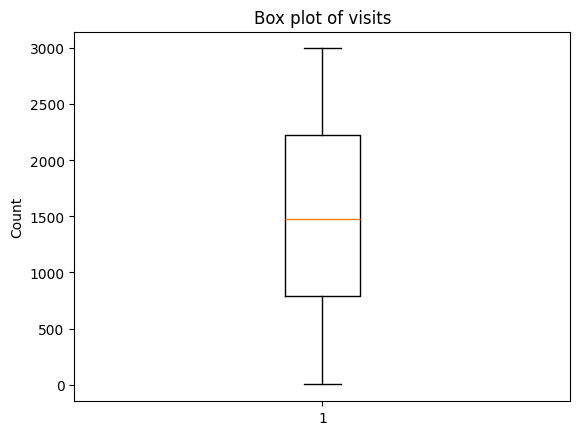

In [16]:
#check for outliers in visit column
plt.boxplot(visit_df["visit"])
plt.ylabel("Count")
plt.title("Box plot of visits")
plt.show()

As we can see that we have data in visit column between 0-3000. However, the main concentration of the data is between ~700 to ~2300. Let us say that anything beyond 2900 and bellow 100 are outliers and lets get rid of them

In [24]:
modified_df = visit_df[(visit_df["visit"] > 100) & (visit_df["visit"] < 2900) ]

In [25]:
print(f"The size of the dataframe after dropping outliers is {modified_df.shape[0]}")

The size of the dataframe after dropping outliers is 923


## Question 3 

In [2]:
import sqlite3

In [3]:
# create a connection to a sqlite datanbase
conn = sqlite3.connect("week5.sqlite")

In [4]:
#create a cursor object
cur = conn.cursor()

In [33]:
#create a table name students in the sqlite databse
cur.execute("""
create table if not exists students(
name text,
address text,
city text,
state text,
zip text,
phone_number text,
primary key(phone_number))""")

In [34]:
# Add 10 rows of data
cur.execute("insert into students values('bob', '1 tudor ln', 'manchester', 'ct', '06042', '860-111-1111')")
cur.execute("insert into students values('rob', '12 tudor ln', 'manchester', 'ct', '06042', '860-111-1112')")
cur.execute("insert into students values('mary', '51 main st', 'south windsor', 'ct', '06028', '929-111-3368')")
cur.execute("insert into students values('donnie', '21 red ln', 'hartford', '06101', 'ct', '860-671-8976')")
cur.execute("insert into students values('kai', '43 jupiter ln', 'hartford', '06174', 'ct', '860-879-8976')")
cur.execute("insert into students values('julian', '24 saturn ave', 'hartford', '06103', 'ct', '860-876-9856')")
cur.execute("insert into students values('aiden', '67 north main st', 'hartford', '06103', 'ct', '860-786-8972')")
cur.execute("insert into students values('lonnie', '35 red ln', 'hartford', '06183', 'ct', '860-671-7972')")
cur.execute("insert into students values('jeff', '2 nature ave', 'hartford', '06074', 'ct', '860-879-8876')")
cur.execute("insert into students values('anya', '21 blue ln', 'hartford', '06183', 'ct', '860-893-9067')")

In [35]:
# Commit after rows are inserted
conn.commit()

In [36]:
# execute Query to fetch all rows
rows = cur.execute("select  * from students")
for row in rows:
    print(row)

('bob', '1 tudor ln', 'manchester', 'ct', '06042', '860-111-1111')
('rob', '12 tudor ln', 'manchester', 'ct', '06042', '860-111-1112')
('mary', '51 main st', 'south windsor', 'ct', '06028', '929-111-3368')
('donnie', '21 red ln', 'hartford', '06101', 'ct', '860-671-8976')
('kai', '43 jupiter ln', 'hartford', '06174', 'ct', '860-879-8976')
('julian', '24 saturn ave', 'hartford', '06103', 'ct', '860-876-9856')
('aiden', '67 north main st', 'hartford', '06103', 'ct', '860-786-8972')
('lonnie', '35 red ln', 'hartford', '06183', 'ct', '860-671-7972')
('jeff', '2 nature ave', 'hartford', '06074', 'ct', '860-879-8876')
('anya', '21 blue ln', 'hartford', '06183', 'ct', '860-893-9067')
